In [1]:
#importing Libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import seaborn as sns
from sklearn.metrics import r2_score

In [7]:
#Reading the data & dropping uneeded columns

data = pd.read_csv("//Users/iain/Crystalisation Internship/Data/DataRaw.csv")
data = data[[ "Source", "Method", "Molecule", "solvent","induction_time" ,"Supersaturation"]].copy()

#Making four new columns

data['ln_t'] = np.log(data['induction_time'])
data['ln_S'] = np.log(data['Supersaturation'])
data['ln_(S-1)'] = np.log(data['Supersaturation']-1)
data['1/S'] = 1/(data['Supersaturation'])

#making two new datasets

data_anti = data.loc[data.Method == "Antisolvent"]
data_cool = data.loc[data.Method == "Cooling"]

#Showing the cleaned data

data.head()

,Source,Method,Molecule,solvent,induction_time,Supersaturation,ln_t,ln_S,ln_(S-1),1/S
0,Beckmann_1999,Antisolvent,Abecarnil,Isopropyl acetate,2.935094,3.892554,1.076740,1.359065,1.062140,0.256901
1,Beckmann_1999,Antisolvent,Abecarnil,Isopropyl acetate,4.000632,3.273095,1.386452,1.185736,0.821142,0.305521
2,Beckmann_1999,Antisolvent,Abecarnil,Isopropyl acetate,4.001133,3.538031,1.386578,1.263570,0.931389,0.282643
3,Beckmann_1999,Antisolvent,Abecarnil,Isopropyl acetate,3.998877,2.706836,1.386014,0.995781,0.534642,0.369435
4,Beckmann_1999,Antisolvent,Abecarnil,Isopropyl acetate,5.947128,1.989765,1.782908,0.688017,-0.010288,0.502572


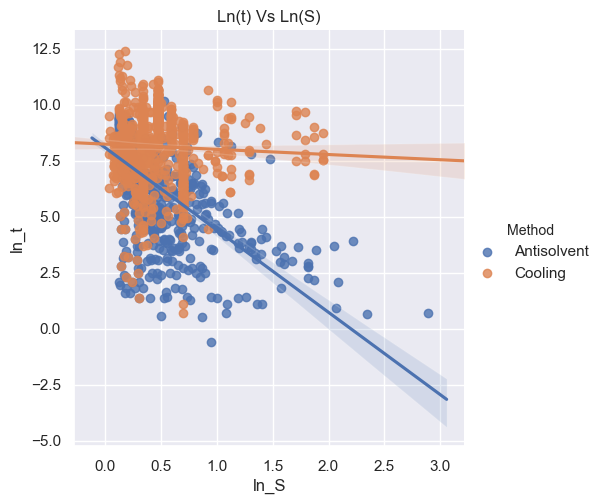

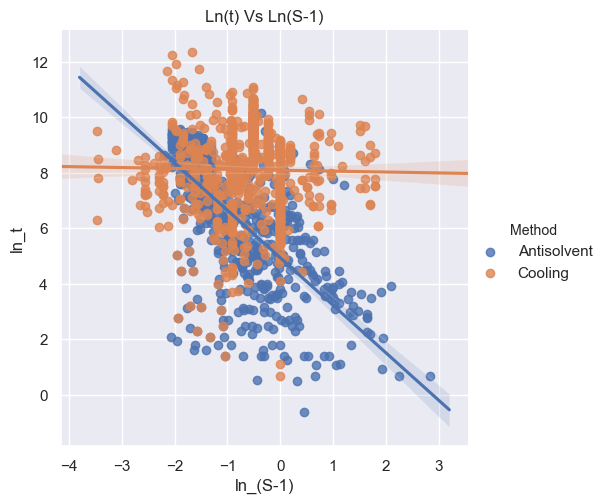

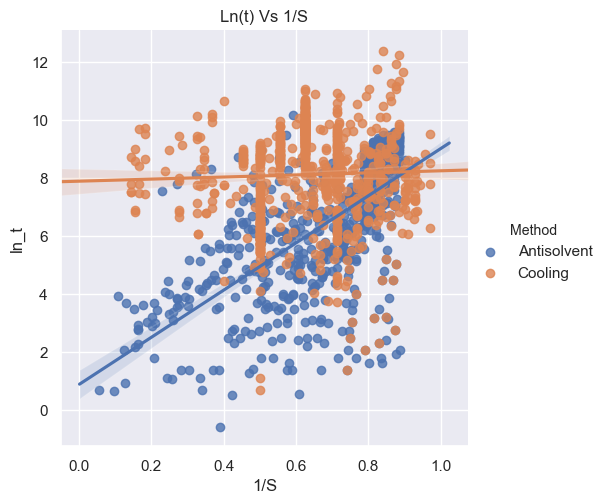

In [24]:
#Increasing the resolution of the figures

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})

#Plotting the figures

sns.lmplot(data=data, y="ln_t", x = "ln_S", hue="Method").set(title="Ln(t) Vs Ln(S)")
plt.savefig("/Users/iainquinn/Crystalisation Internship/Figures/Ln(t) Vs Ln(S).png",bbox_inches="tight")

sns.lmplot(data=data, y="ln_t", x = "ln_(S-1)", hue="Method").set(title="Ln(t) Vs Ln(S-1)")
plt.savefig("/Users/iainquinn/Crystalisation Internship/Figures/Ln(t) Vs Ln(S-1).png",bbox_inches="tight")

sns.lmplot(data=data, y="ln_t", x = "1/S", hue="Method").set(title="Ln(t) Vs 1/S")
plt.savefig("/Users/iainquinn/Crystalisation Internship/Figures/Ln(t) Vs S^-1.png",bbox_inches="tight")

In [32]:
Y = np.c_[data_anti["ln_t"]]
X = np.c_[data_anti["ln_(S-1)"]]
model = sklearn.linear_model.LinearRegression()
model.fit(X, Y)
prediction=model.predict(X)
from sklearn.metrics import r2_score
r2_score(Y, prediction)

0.46062702279477974

In [33]:
#Making lists of each unique molecule, source and solvent in the dataset

molecule_list = data.Molecule.unique()
molecule_list_antisolvent = data_antisolvent.Molecule.unique()
molecule_list_cooling = data_cooling.Molecule.unique()

source_list = data.Source.unique()
source_list_antisolvent = data_antisolvent.Source.unique()
source_list_cooling = data_cooling.Source.unique()

solvent_list= data.solvent.unique()
solvent_list_antisolvent = data_antisolvent.solvent.unique()
solvent_list_cooling = data_cooling.solvent.unique()

In [182]:
method_1, method_2, method_3 = [], [], []
score_1, score_2, score_3 = [], [], []
slope_1, slope_2, slope_3 = [], [], []
intercept_1, intercept_2, intercept_3 = [], [], []
molecules_1, molecules_2, molecules_3=[],[],[]
sources_1, sources_2 ,sources_3=[],[],[]
solvents_1, solvents_2, solvents_3,=[],[],[]

for solvent in solvent_list_antisolvent:
    data_set=data.loc[data.solvent == solvent]
    Y = np.c_[data_set["ln_t"]]
    X = np.c_[data_set["ln_(S-1)"]]
    model = sklearn.linear_model.LinearRegression()
    model.fit(X, Y)
    prediction=model.predict(X)
    molecules_1.append(molecule)
    score_1.append(r2_score(Y, prediction))
    slope_1.append(float(model.coef_))
    intercept_1.append(float(model.intercept_))
    
    
df_1 = pd.DataFrame(list(zip( molecules_1, slope_1, intercept_1, score_1)) , columns=['solvent','slope', 'intercept', 'r2'])

In [172]:
df_1=df_1.loc[df_1.r2 >0.7]

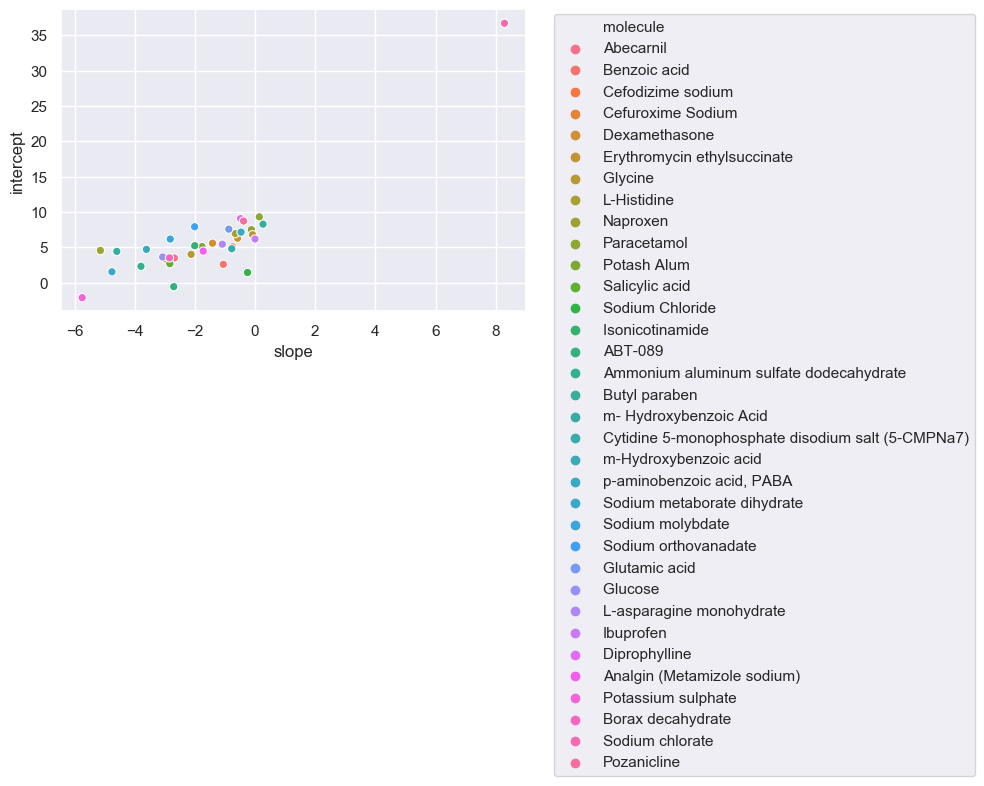

In [177]:
sns.scatterplot(x="slope", y="intercept", data=df_1, hue="molecule")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.3)
plt.savefig("/Users/iainquinn/Crystalisation Internship/Figures/3.png",bbox_inches="tight")

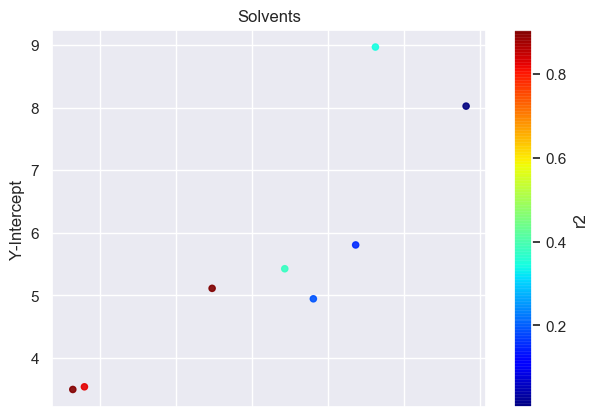

In [183]:
df_1.plot(kind= 'scatter', x="slope", y= "intercept",c="r2",colorbar=True, alpha = 0.9, 
                               cmap=plt.get_cmap("jet"), figsize=(7,5), title ="Solvents")
plt.xlabel("Slope")
plt.ylabel("Y-Intercept")
plt.savefig("/Users/iainquinn/Crystalisation Internship/Figures/3.png",bbox_inches="tight")